# FixU Student Project

## Library

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Data Wrangling

### Gathering Data

In [2]:
df = pd.read_csv('../dataset/depression.csv')

In [3]:
df.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Isha,Female,44,Thane,Working Professional,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No
4,Aarav,Male,48,Indore,Working Professional,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No


### Assessing Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   2556 non-null   object 
 1   Gender                                 2556 non-null   object 
 2   Age                                    2556 non-null   int64  
 3   City                                   2556 non-null   object 
 4   Working Professional or Student        2556 non-null   object 
 5   Profession                             1883 non-null   object 
 6   Academic Pressure                      502 non-null    float64
 7   Work Pressure                          2054 non-null   float64
 8   CGPA                                   502 non-null    float64
 9   Study Satisfaction                     502 non-null    float64
 10  Job Satisfaction                       2054 non-null   float64
 11  Slee

In [5]:
df.isna().sum()

Name                                        0
Gender                                      0
Age                                         0
City                                        0
Working Professional or Student             0
Profession                                673
Academic Pressure                        2054
Work Pressure                             502
CGPA                                     2054
Study Satisfaction                       2054
Job Satisfaction                          502
Sleep Duration                              0
Dietary Habits                              0
Degree                                      0
Have you ever had suicidal thoughts ?       0
Work/Study Hours                            0
Financial Stress                            0
Family History of Mental Illness            0
Depression                                  0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

### Cleaning Data

In [7]:
df = df.drop(columns=['Name', 'City', 'Working Professional or Student', 'Profession', 'Work Pressure', 'CGPA', 'Job Satisfaction', 'Degree'])

In [8]:
df.rename(columns={
    'Work/Study Hours': 'Study Hours',
}, inplace=True)

In [9]:
df = df.dropna()

In [10]:
df.isna().sum()

Gender                                   0
Age                                      0
Academic Pressure                        0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Study Hours                              0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 502 entries, 17 to 2555
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    object 
 1   Age                                    502 non-null    int64  
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    object 
 5   Dietary Habits                         502 non-null    object 
 6   Have you ever had suicidal thoughts ?  502 non-null    object 
 7   Study Hours                            502 non-null    int64  
 8   Financial Stress                       502 non-null    int64  
 9   Family History of Mental Illness       502 non-null    object 
 10  Depression                             502 non-null    object 
dtypes: float6

## Data Preprocessing

### Mapping

In [12]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

In [13]:
df['Sleep Duration'] = df['Sleep Duration'].map({
    'Less than 5 hours': 0,
    '5-6 hours': 1,
    '7-8 hours': 2,
    'More than 8 hours': 3
})

In [14]:
df['Dietary Habits'] = df['Dietary Habits'].map({'Unhealthy': 0, 'Moderate': 1, 'Healthy': 2})

In [15]:
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map({'No': 0, 'Yes': 1})

In [16]:
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map({'No': 0, 'Yes': 1})

In [17]:
df['Depression'] = df['Depression'].map({'No': 0, 'Yes': 1})

In [18]:
df = df.astype(int)

In [19]:
df.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
17,1,28,2,4,2,1,1,9,2,1,0
19,1,28,4,5,1,2,1,7,1,1,0
28,1,25,1,3,1,0,1,10,4,0,1
33,1,23,1,4,3,0,1,7,2,1,0
35,0,31,1,5,3,2,1,4,2,1,0


## Modeling

### Train Test Split

In [20]:
features = [col for col in df.columns if col not in ['Depression']]
target = 'Depression'

In [21]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Neural Network Model

In [22]:
def create_nn(input_dim):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=(input_dim,)))
    model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform'))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [23]:
model = create_nn(X_train.shape[1])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5067 - loss: 4.6838 - val_accuracy: 0.6634 - val_loss: 0.7355
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5202 - loss: 3.1982 - val_accuracy: 0.7030 - val_loss: 0.6276
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5799 - loss: 2.5336 - val_accuracy: 0.6832 - val_loss: 0.8247
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5989 - loss: 2.4576 - val_accuracy: 0.7228 - val_loss: 0.6500
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6594 - loss: 1.6610 - val_accuracy: 0.7525 - val_loss: 0.5943
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6466 - loss: 1.4334 - val_accuracy: 0.7822 - val_loss: 0.5523
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6726 - loss: 1.2085 - val_accuracy: 0.7921 - val_loss: 0.3908
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6504 - loss: 1.1844 - val_accuracy: 0.7822 - 

## Model Evaluation

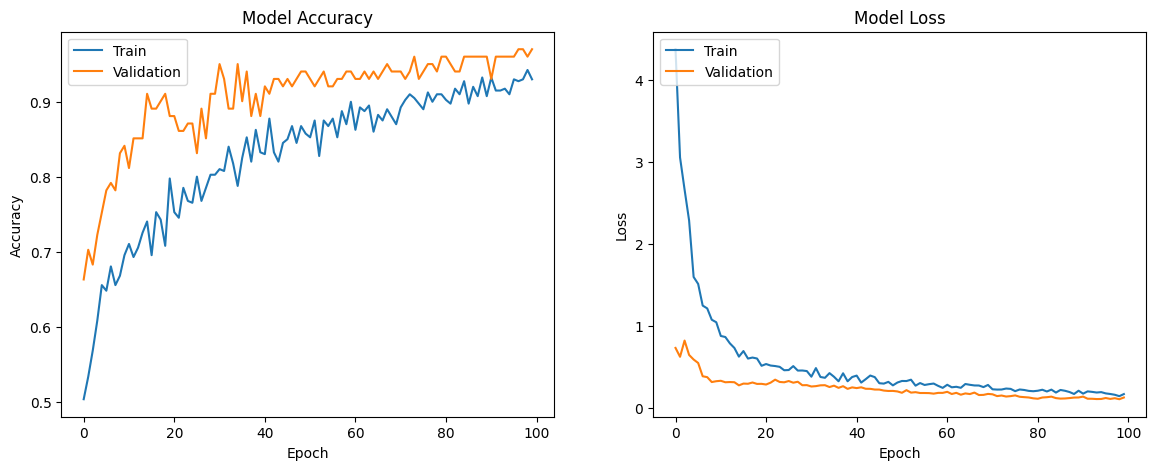

In [24]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [25]:
y_pred_test = (model.predict(X_test) > 0.5).astype(int).ravel()

report = classification_report(y_test, y_pred_test, target_names=['No Depression', 'Depression'])
print(report)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
               precision    recall  f1-score   support

No Depression       1.00      0.94      0.97        48
   Depression       0.95      1.00      0.97        53

     accuracy                           0.97       101
    macro avg       0.97      0.97      0.97       101
 weighted avg       0.97      0.97      0.97       101



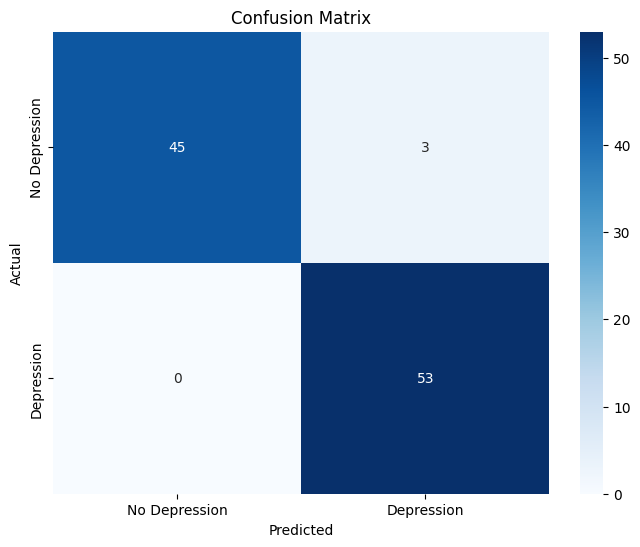

In [26]:
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Prediction

In [27]:
new_data = np.array([
    [1, 20, 3, 3, 7, 1, 0, 3, 1, 0],
    [1, 21, 4, 2, 8, 0, 0, 2, 3, 0]
])

predictions = model.predict(new_data)


for i, probability in enumerate(predictions):
    print(f"Data {i+1}:")
    print("Predicted Probability (Class 1):", probability[0])
    predicted_class = 1 if probability[0] > 0.5 else 0
    print("Predicted Class:", predicted_class)
    print('-' * 30)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Data 1:
Predicted Probability (Class 1): 0.00024102912
Predicted Class: 0
------------------------------
Data 2:
Predicted Probability (Class 1): 0.09864961
Predicted Class: 0
------------------------------


## Save Model

In [28]:
model.save('../backend/models/nn_student.h5')